In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Получите и визуализируйте статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

In [90]:
data = pd.read_csv("student_performance_set.csv")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.

In [91]:
# Кодирование
mapping = {"Yes": 1, "No": 0}
data["Extracurricular Activities"].replace(mapping, inplace=True)

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Extracurricular Activities'}>,
        <Axes: title={'center': 'Sleep Hours'}>],
       [<Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: title={'center': 'Performance Index'}>]], dtype=object)

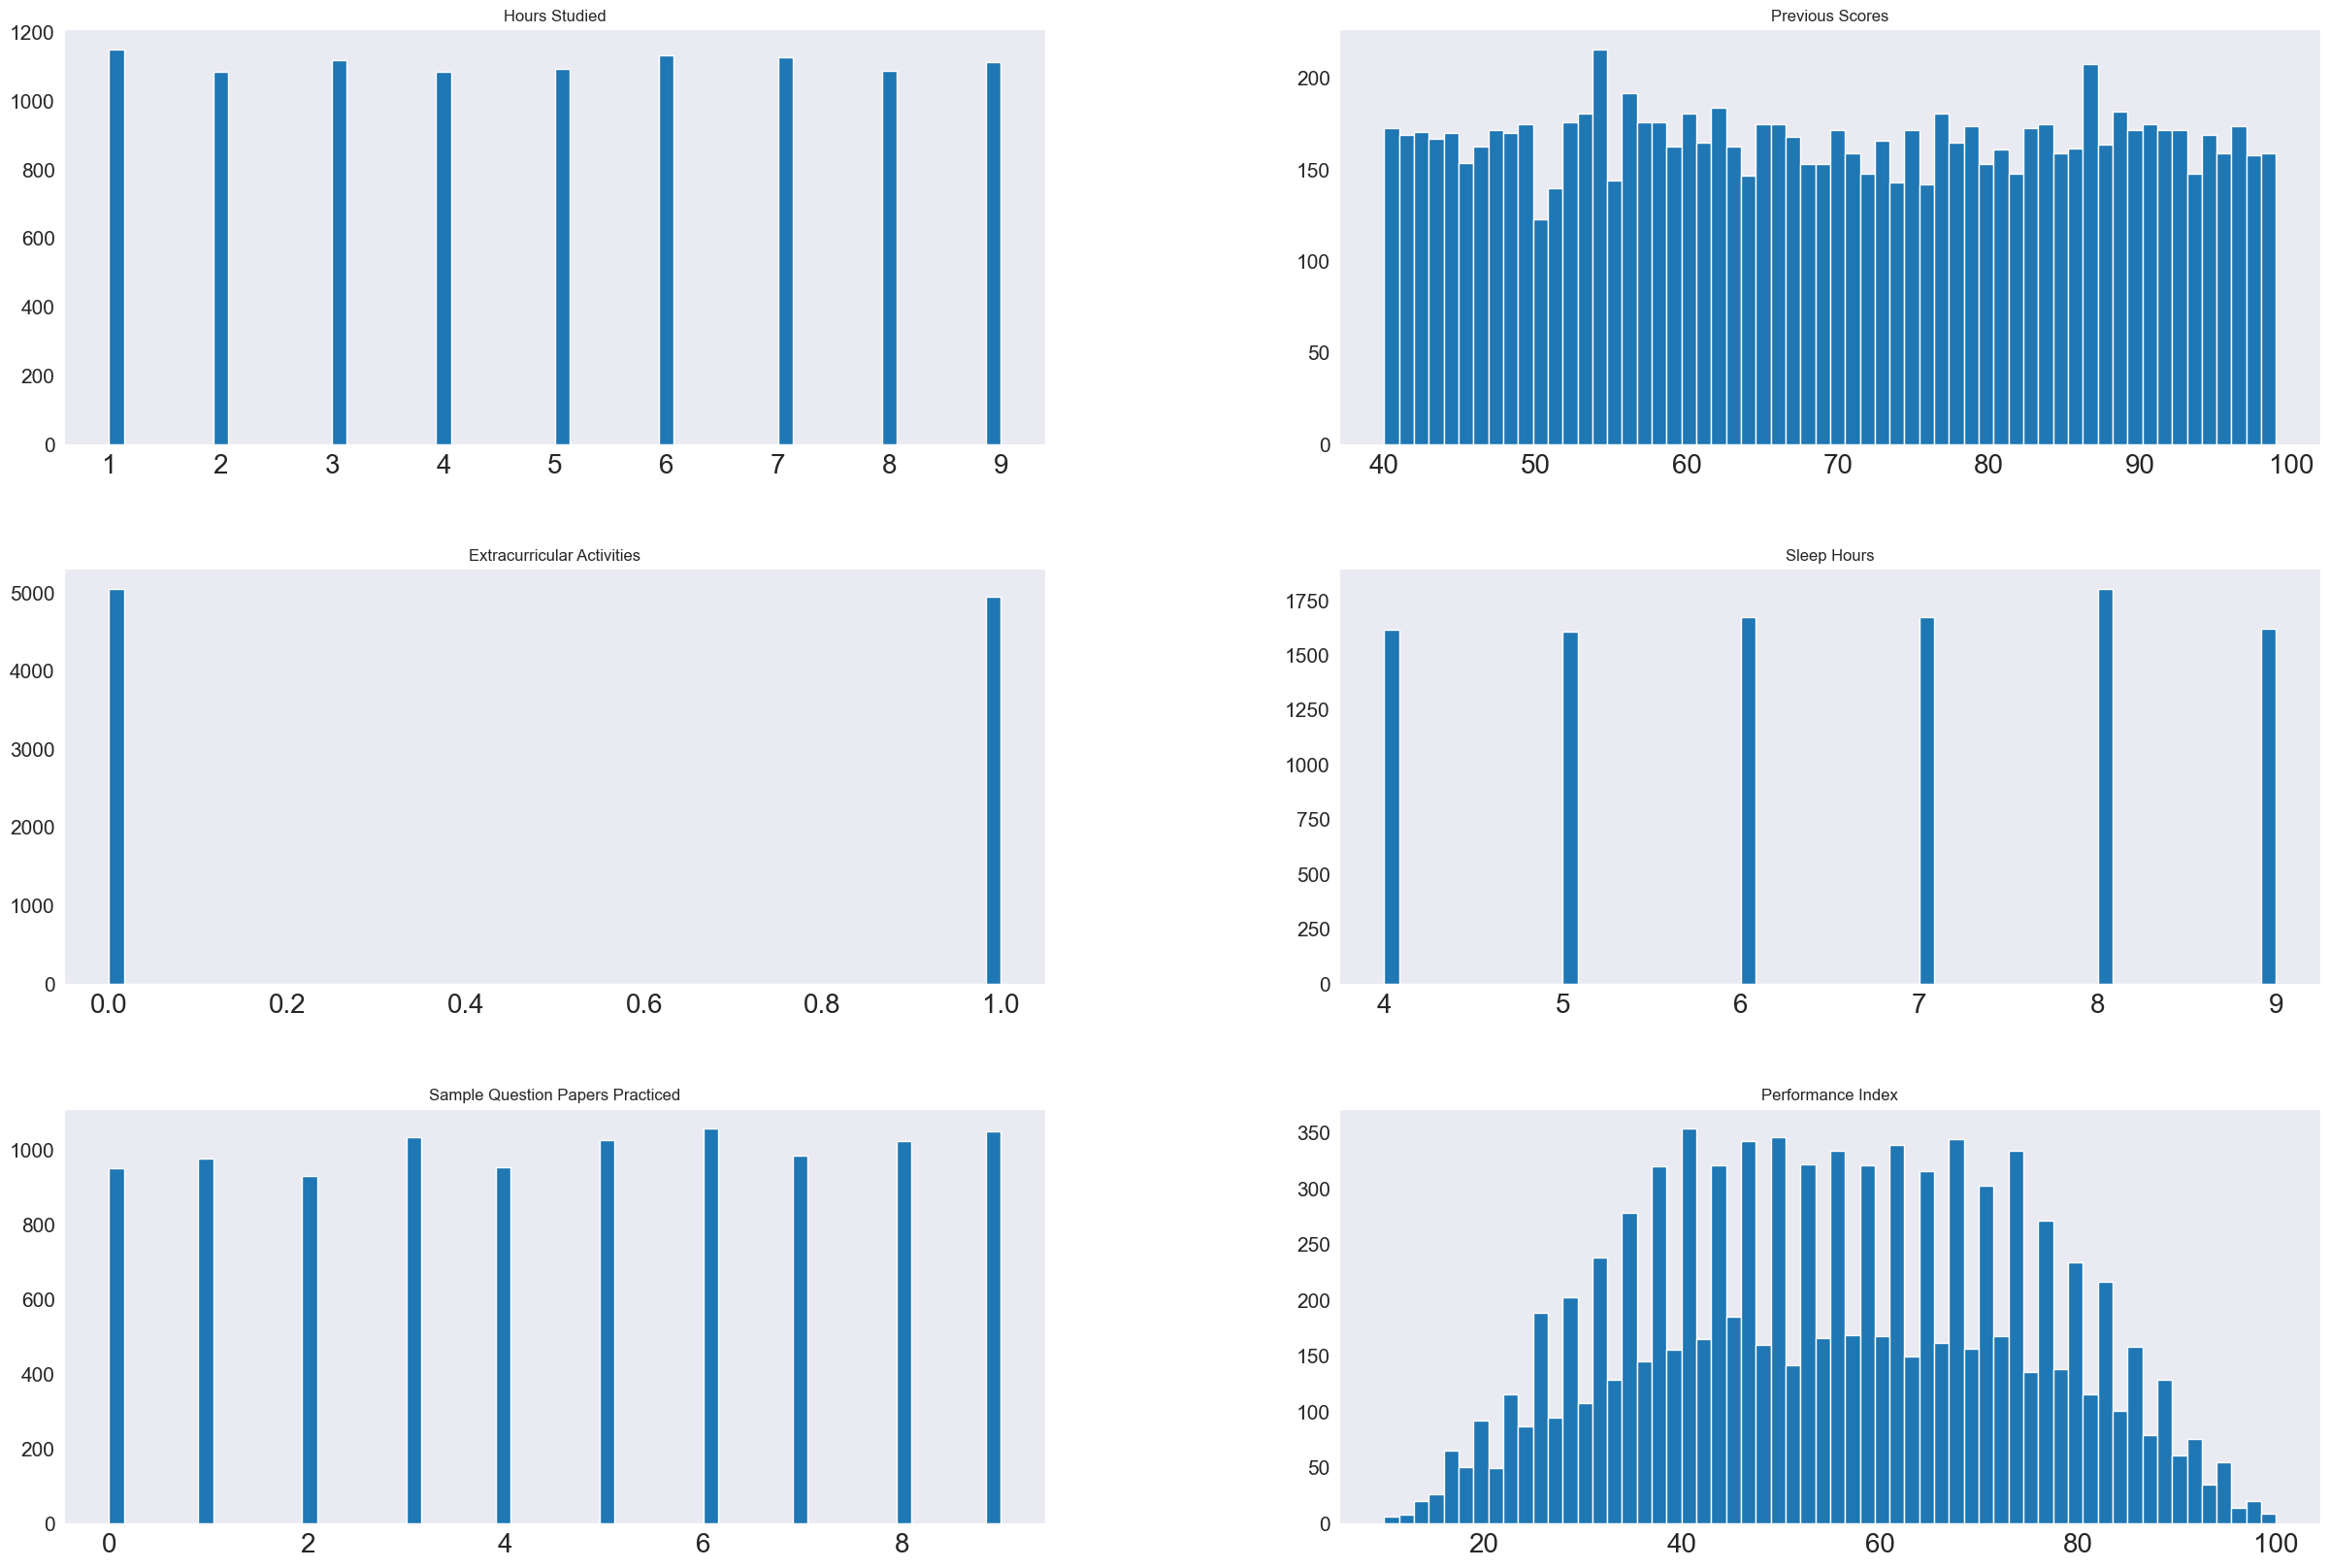

In [92]:
data.hist(figsize=(30, 20), grid=False, xlabelsize=20, ylabelsize=15, bins=60,)

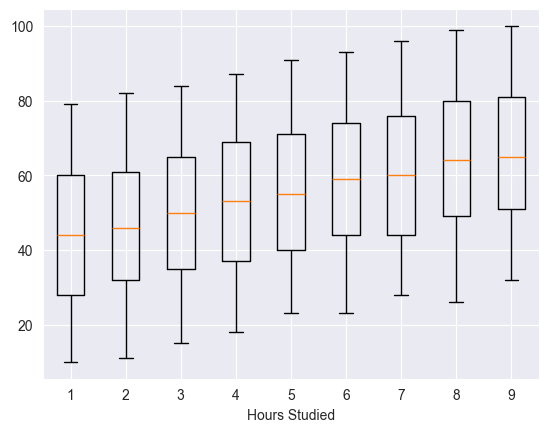

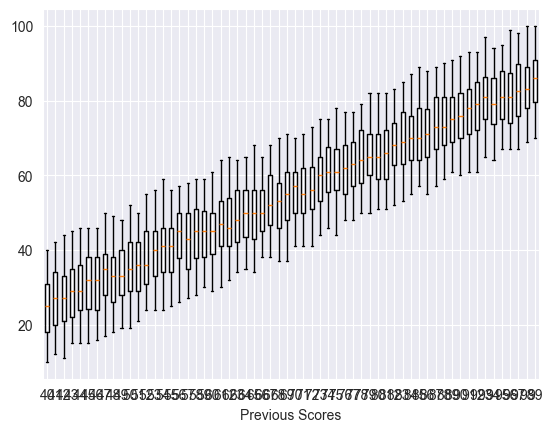

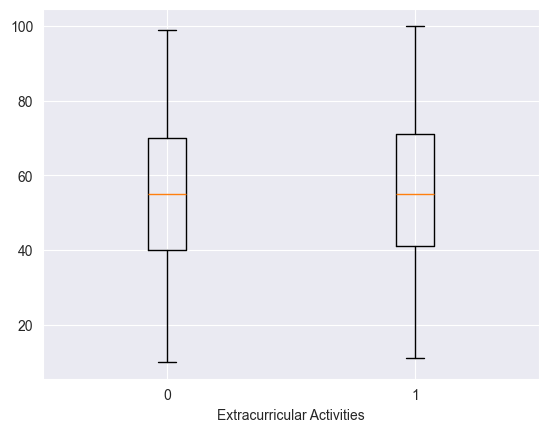

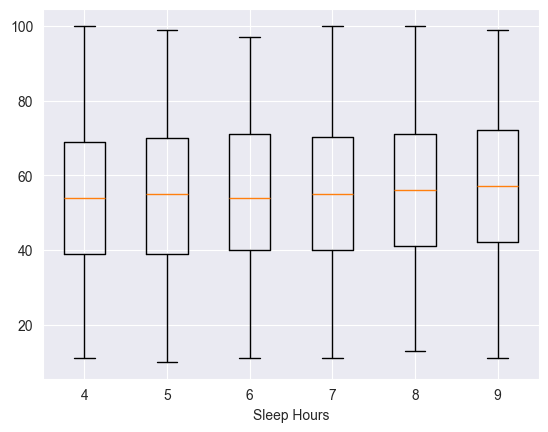

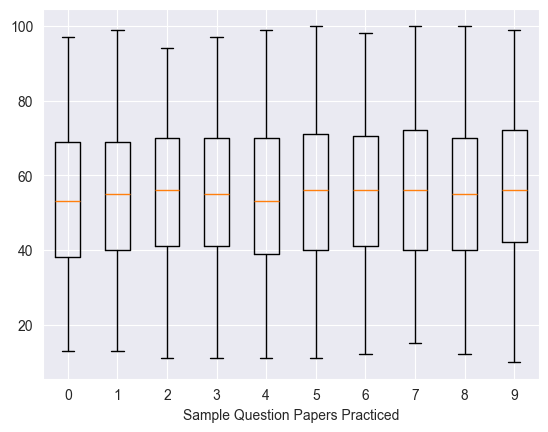

In [118]:
cols_boxplot = list(data.columns)
cols_boxplot.remove("Performance Index")

for column in cols_boxplot:
    grouped_data = data.groupby(column)["Performance Index"]
    grouped_data_frames = [group for _, group in grouped_data]
    plt.boxplot(grouped_data_frames, labels=grouped_data.groups.keys())
    plt.xlabel(column)
    plt.show()

<Axes: >

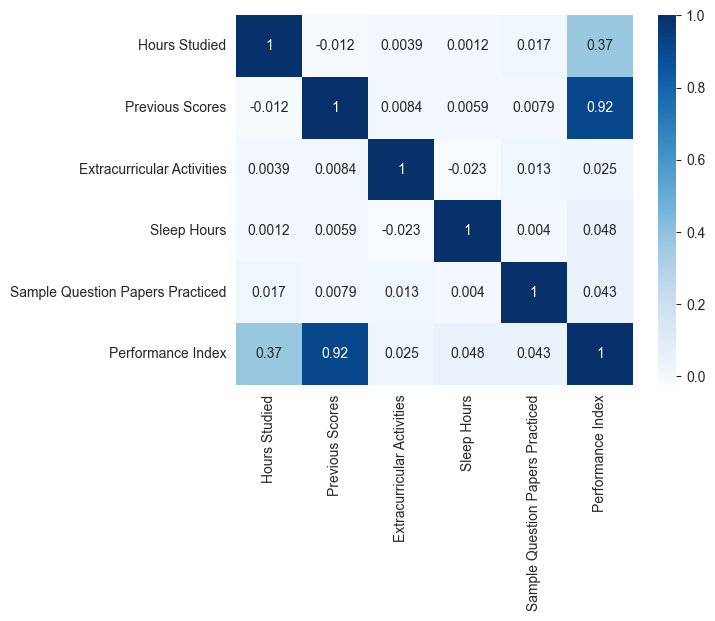

In [119]:
corr_matrix = data.corr()
sb.heatmap(corr_matrix, cmap="Blues", annot=True)

In [76]:
for column in data.columns:
    min_v = data[column].min()
    max_v = data[column].max()
    data[column] = (data[column] - min_v) / (max_v - min_v)

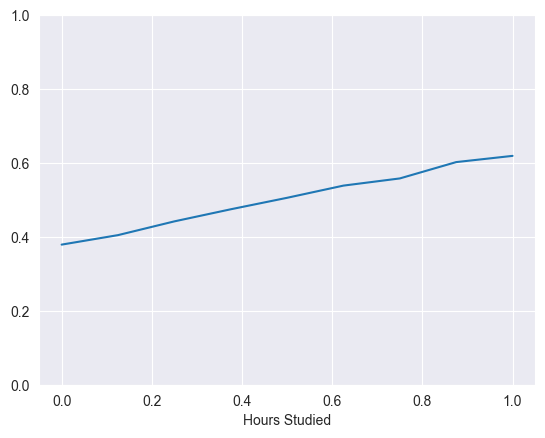

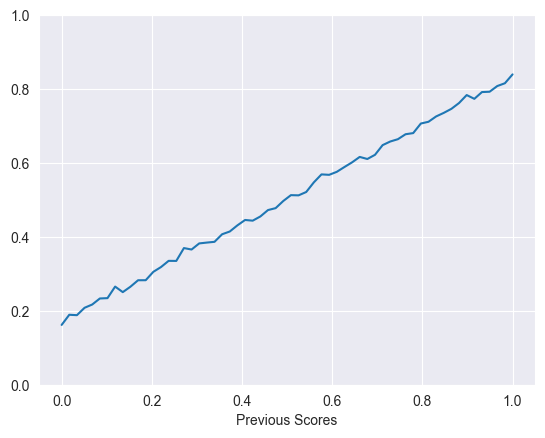

In [78]:
study_means = data.groupby("Hours Studied").mean()
plt.plot(study_means["Performance Index"], scaley=False)
plt.xlabel("Hours Studied")
plt.show()
prev_score_means = data.groupby("Previous Scores").mean()
plt.plot(prev_score_means["Performance Index"], scaley=False)
plt.xlabel("Previous Scores")
plt.show()

Разделите данные на обучающий и тестовый наборы данных.

In [79]:
train_percent = 0.8
random_state = 123456789

train = data.sample(frac=train_percent, random_state=random_state)
test = data.drop(train.index)
train_x = train.drop('Performance Index', axis=1)
train_y = train['Performance Index']
test_x = test.drop('Performance Index', axis=1)
test_y = test['Performance Index']

Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas. Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.

In [80]:
class LeastSquaresMethod:
    def __init__(self, columns: list[str]):
        self.cf = None
        self.columns = columns

    @staticmethod
    def _add_ones(x):
        return np.concatenate((np.ones((len(x), 1)), x), axis=1)

    @staticmethod
    def sum_of_squares(true_y, predicted_y):
        return np.sum(np.square(true_y - predicted_y))

    @staticmethod
    def count_determination(true_y, predicted_y):
        mean_y = np.mean(true_y)
        total_ss = np.sum(np.square(true_y - mean_y))
        residual_ss = np.sum(np.square(true_y - predicted_y))
        return 1 - residual_ss / total_ss

    def train_model(self, tr_x, tr_y):
        x = LeastSquaresMethod._add_ones(np.array(tr_x[self.columns]))
        y = np.array(tr_y)
        # x.T - transposed matrix
        # @ - multiply matrices
        # np.linalg.inv - inverted matrix
        self.cf = np.linalg.inv((x.T @ x)) @ x.T @ y

    def predict(self, x):
        return  np.array(LeastSquaresMethod._add_ones(x[self.columns])) @ self.cf.T



Модели по всем признакам и по двум самым детерминированным

In [81]:
lsm = LeastSquaresMethod(['Hours Studied'])
lsm.train_model(train_x, train_y)
pred_y = lsm.predict(test_x)
print('Коэффициент детерминации:', LeastSquaresMethod.count_determination(test_y, pred_y))
print('Сумма квадратов:', LeastSquaresMethod.sum_of_squares(test_y, pred_y))

Коэффициент детерминации: 0.12143650435339226
Сумма квадратов: 79.99389909644196


In [82]:
lsm = LeastSquaresMethod(['Previous Scores'])
lsm.train_model(train_x, train_y)
pred_y = lsm.predict(test_x)
print('Коэффициент детерминации:', LeastSquaresMethod.count_determination(test_y, pred_y))
print('Сумма квадратов:', LeastSquaresMethod.sum_of_squares(test_y, pred_y))

Коэффициент детерминации: 0.8352052587080384
Сумма квадратов: 15.004691148510883


In [83]:
cols = list(train_x.columns)
cols.remove("Previous Scores")
lsm = LeastSquaresMethod(cols)
lsm.train_model(train_x, train_y)
pred_y = lsm.predict(test_x)
print('Коэффициент детерминации:', LeastSquaresMethod.count_determination(test_y, pred_y))
print('Сумма квадратов:', LeastSquaresMethod.sum_of_squares(test_y, pred_y))

Коэффициент детерминации: 0.12889015989638175
Сумма квадратов: 79.31523788144725


In [84]:
cols = list(train_x.columns)
cols.remove("Previous Scores")
cols.remove("Hours Studied")
lsm = LeastSquaresMethod(cols)
lsm.train_model(train_x, train_y)
pred_y = lsm.predict(test_x)
print('Коэффициент детерминации:', LeastSquaresMethod.count_determination(test_y, pred_y))
print('Сумма квадратов:', LeastSquaresMethod.sum_of_squares(test_y, pred_y))

Коэффициент детерминации: 0.0025262858558415813
Сумма квадратов: 90.82076826089342


Две наиболее коррелированные ячейки задают большую часть детерминированности модели линейной регрессии, остальные факторы, вроде количества сна или количества решенных билетов фактически не влияют на результат, поэтому их можно исключить из выборки.
Метод линейной регрессии является статическим и обучается сразу на всей выборке, определяя единственную матрицу коэффициентов. Это позволяет быстро находить ответ при обученной модели, но не позволяет ее дообучать.

In [85]:
lsm = LeastSquaresMethod(["Hours Studied", "Previous Scores"])
lsm.train_model(train_x, train_y)
pred_y = lsm.predict(test_x)
print('Коэффициент детерминации:', LeastSquaresMethod.count_determination(test_y, pred_y))
print('Сумма квадратов:', LeastSquaresMethod.sum_of_squares(test_y, pred_y))

Коэффициент детерминации: 0.9857591601052492
Сумма квадратов: 1.2966397024620961
